In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [2]:
ls crime_data_raw/2014

apr14.xls*  dec14.xls*  jan14.xls*  jun14.xls*  may14.xls*  oct14.xls*
aug14.xls*  feb14.xls*  jul14.xls*  mar14.xls*  nov14.xls*  sep14.xls*


In [3]:
path = 'crime_data_raw/2014'

In [4]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 15 columns):
# Of             7613 non-null float64
# Of Offenses    52214 non-null float64
# Offenses       10319 non-null float64
# offenses       51604 non-null float64
Beat             121734 non-null object
Block Range      69989 non-null object
BlockRange       51604 non-null object
Date             121746 non-null datetime64[ns]
Hour             121750 non-null object
Offense Type     121750 non-null object
Premise          92169 non-null object
Street Name      70146 non-null object
StreetName       51604 non-null object
Suffix           121750 non-null object
Type             121750 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 13.9+ MB


In [9]:
#df.Date.unique()

In [10]:
df[df.Date.isnull()]

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
54412,NaN,NaN,1.0,NaN,13D40,8500-8599,NaN,NaT,15,Theft,NaN,SAM HOUSTON,NaN,S,PKWY
56526,NaN,NaN,1.0,NaN,18F40,2700-2799,NaN,NaT,14,Robbery,NaN,DUNVALE,NaN,-,RD
64547,1.0,NaN,NaN,NaN,14D40,5600-5699,NaN,NaT,08,Burglary,NaN,SELINSKY,NaN,-,RD
69191,1.0,NaN,NaN,NaN,7C20,3900-3999,NaN,NaT,11,Theft,NaN,CAVALCADE,NaN,-,-


## Inspect Premise col

In [11]:
len(df.Premise.value_counts(dropna=False))

251

In [12]:
df.Premise.value_counts(dropna=False).head()

NaN                   29581
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

In [13]:
df.Premise.unique()

array(['18D', '13R', '20A', '03B', '250', '20D', '20N', '18A', '20R',
       '20C', '150', '18N', '18P', '140', '18G', '22H', '18B', '18O',
       '070', '18T', '210', '13S', '13B', '18M', '190', '11R', '05L',
       '18U', '18C', '080', '24E', '24C', '23S', '100', '18R', '05O',
       '03S', '120', '05Z', '18H', '05N', '01B', '05F', '20M', '05D',
       '240', '18S', '24A', '13H', '11P', '20P', '13A', '20L', '18W',
       '05C', '05M', '170', '05B', '09P', '---', '20G', '09D', '040',
       '05E', '05Q', '24P', '24G', '05W', '20V', '05U', '05V', '060',
       '22M', '24F', '05Y', '05R', '25V', '11G', '05X', '05G', '11L',
       '22E', '11F', '04V', '09H', '24S', '02B', '22C', '22P', '01A',
       '22U', '01K', '02S', '11S', '01P', '05S', '05H', '05T', '06',
       '22D', '24B', '05A', '24J', '24M', '24T', '02C', '24V', '23C', 'N',
       '09R', '05P', '01T', '13T', '18L', 'Residence or House',
       'Driveway', 'Apartment Parking Lot', nan,
       'Bar or Night Club Parking Lot', 'Co

In [14]:
df.Premise = df.Premise.str.strip()

In [15]:
len(df.Premise.value_counts(dropna=False))

251

In [16]:
df.Premise.value_counts(dropna=False).head()

NaN                   29581
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

In [17]:
# check if  null values
df.isnull().values.any().any()

True

In [18]:
# check su, of null values
df.isnull().values.sum()

638508

In [19]:
len(df[df.isnull().any(axis=1)])

121750

## Visualize our data

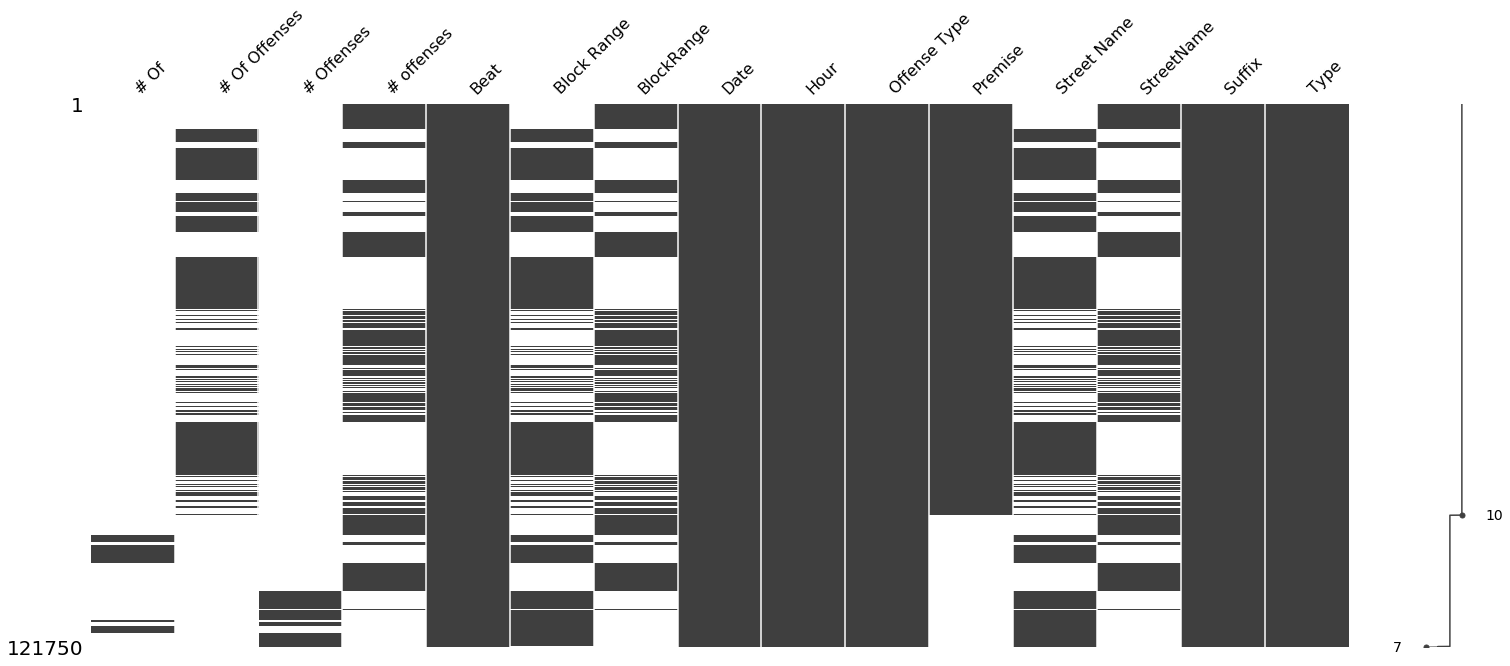

In [20]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 15 columns):
# Of             7613 non-null float64
# Of Offenses    52214 non-null float64
# Offenses       10319 non-null float64
# offenses       51604 non-null float64
Beat             121734 non-null object
Block Range      69989 non-null object
BlockRange       51604 non-null object
Date             121746 non-null datetime64[ns]
Hour             121750 non-null object
Offense Type     121750 non-null object
Premise          92169 non-null object
Street Name      70146 non-null object
StreetName       51604 non-null object
Suffix           121750 non-null object
Type             121750 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 13.9+ MB


In [22]:
df.head()

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,2014-04-28,5,Murder,13R,MCKINNEY,NaN,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,NaN,2014-04-27,18,Murder,20A,HILLMONT,NaN,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,NaN,2014-04-09,18,Murder,20A,RENWICK,NaN,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,NaN,2014-04-24,3,Murder,03B,RICHMOND,NaN,-,AVE


In [23]:
# 2014
# if duplicate columns

df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
                              df['# Of Offenses'].dropna(),
                              df['# offenses'].dropna(),
                              df['# Offenses'].dropna()]).reindex_like(df)

In [24]:
df.head()

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,8500-8599,2014-04-19,17,Murder,18D,MARTIN LUTHER KING,MARTIN LUTHER KING,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,3600-3699,2014-04-28,5,Murder,13R,MCKINNEY,MCKINNEY,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,7400-7499,2014-04-27,18,Murder,20A,HILLMONT,HILLMONT,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,5400-5499,2014-04-09,18,Murder,20A,RENWICK,RENWICK,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,9300-9399,2014-04-24,3,Murder,03B,RICHMOND,RICHMOND,-,AVE


In [25]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 15 columns):
# Of           7613 non-null float64
NumOffenses    121750 non-null float64
# Offenses     10319 non-null float64
# offenses     51604 non-null float64
Beat           121734 non-null object
Block Range    69989 non-null object
BlockRange     121593 non-null object
Date           121746 non-null datetime64[ns]
Hour           121750 non-null object
OffenseType    121750 non-null object
Premise        92169 non-null object
Street Name    70146 non-null object
StreetName     121750 non-null object
Suffix         121750 non-null object
Type           121750 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 13.9+ MB


In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
#     'Block Range': 'BlockRange',
#     'Street Name': 'StreetName'
# }, inplace=True)
# df.info()

## Subset dataframe to work on 

In [26]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 8 columns):
Date           121746 non-null datetime64[ns]
Beat           121734 non-null object
BlockRange     121593 non-null object
StreetName     121750 non-null object
OffenseType    121750 non-null object
Premise        92169 non-null object
NumOffenses    121750 non-null float64
Hour           121750 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 7.4+ MB


In [27]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
0,2014-04-19,14D30,8500-8599,MARTIN LUTHER KING,Murder,18D,1.0,17
1,2014-04-28,10H20,3600-3699,MCKINNEY,Murder,13R,1.0,5
2,2014-04-27,5F30,7400-7499,HILLMONT,Murder,20A,3.0,18
3,2014-04-09,17E10,5400-5499,RENWICK,Murder,20A,2.0,18
4,2014-04-24,18F50,9300-9399,RICHMOND,Murder,03B,1.0,3


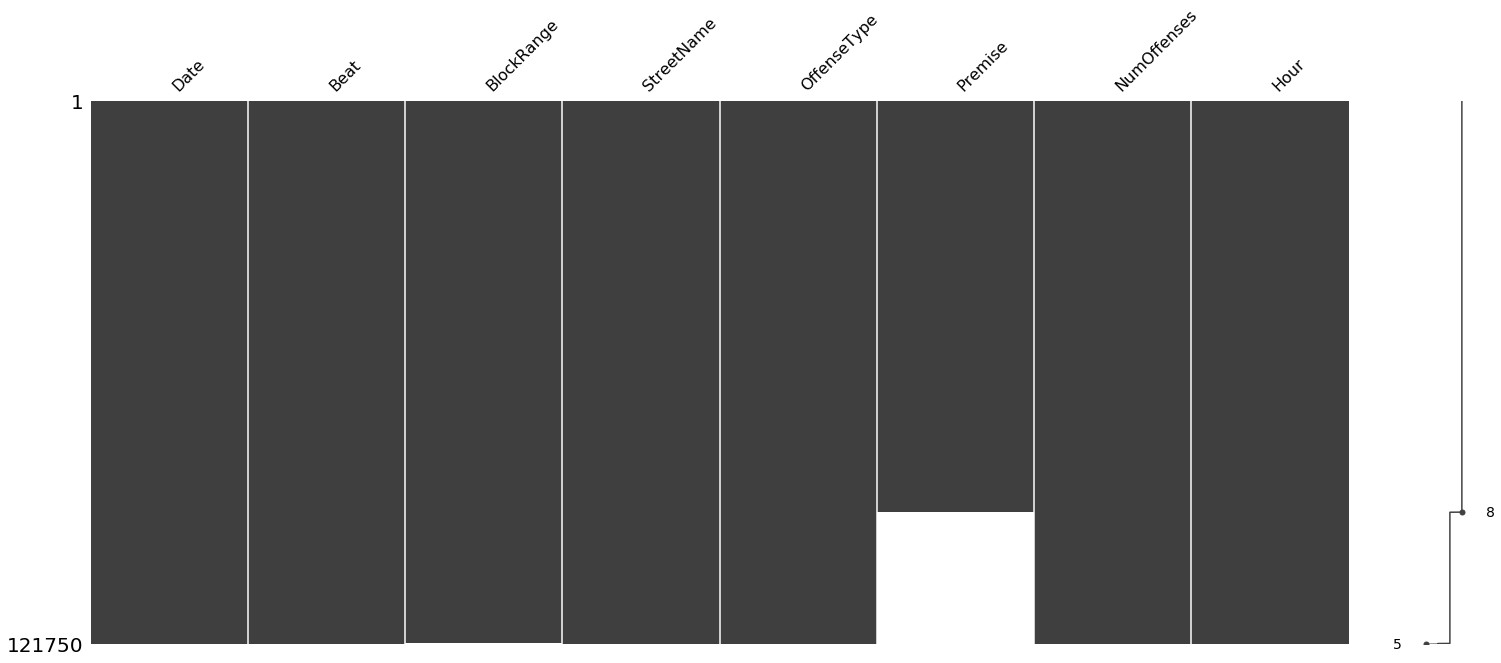

In [28]:

sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [29]:
len(crimes[crimes.Date.isnull()])

4

In [30]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
54412,NaT,13D40,8500-8599,SAM HOUSTON,Theft,NaN,1.0,15
56526,NaT,18F40,2700-2799,DUNVALE,Robbery,NaN,1.0,14
64547,NaT,14D40,5600-5699,SELINSKY,Burglary,NaN,1.0,08
69191,NaT,7C20,3900-3999,CAVALCADE,Theft,NaN,1.0,11


In [31]:
len(crimes[crimes.Beat.isnull()])

16

In [32]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
52628,2014-07-19,NaN,2100-2199,VINTAGE,Theft,NaN,1.0,11
52629,2014-07-13,NaN,500-599,W.38TH,Theft,NaN,1.0,8
52630,2014-07-26,NaN,6100-6199,ATTWATER,Rape,NaN,1.0,15
52631,2014-07-13,NaN,7800-7899,FM 1960,Theft,NaN,1.0,15
52632,2014-07-14,NaN,6600-6699,MERRY,Theft,NaN,1.0,9
52633,2014-07-22,NaN,NaN,WALKER,Theft,NaN,1.0,20
52634,2014-07-03,NaN,8400-8499,S. GESSNER,Theft,NaN,1.0,2
52635,2014-07-16,NaN,NaN,PEASE,Theft,NaN,1.0,13
52636,2014-07-26,NaN,6100-6199,ATTWATER,Rape,NaN,1.0,14
52637,2014-07-10,NaN,800-899,GESSNER SUITE 970,Theft,NaN,1.0,20


In [33]:
len(crimes[crimes.BlockRange.isnull()])

157

In [34]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
52633,2014-07-22,NaN,NaN,WALKER,Theft,NaN,1.0,20
52635,2014-07-16,NaN,NaN,PEASE,Theft,NaN,1.0,13
52654,2014-07-27,10H10,NaN,212.5 LENOX,Burglary,NaN,1.0,7
53200,2014-07-02,10H80,NaN,2600 DUNLAVY + WESTHEIMER,Auto Theft,NaN,1.0,12
53518,2014-07-12,12D10,NaN,EDGEBROOK,Theft,NaN,1.0,11
53657,2014-07-31,12D10,NaN,EDGEBROOK,Theft,NaN,1.0,17
53756,2014-07-07,12D20,NaN,1,Auto Theft,NaN,1.0,6
53809,2014-07-06,12D30,NaN,GULF,Theft,NaN,1.0,17
54404,2014-07-11,13D40,NaN,PEARLAND,Theft,NaN,1.0,12
55325,2014-07-04,16E10,NaN,ALMEDA GENOA,Theft,NaN,1.0,10


In [35]:
len(crimes[crimes.StreetName.isnull()])

0

In [36]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [37]:
len(crimes[crimes.OffenseType.isnull()])

0

In [38]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [39]:
len(crimes[crimes.Premise.isnull()])

29581

In [40]:
crimes[crimes.Premise.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
10412,2014-08-08,10H10,5300-5399,HARRISBURG,Aggravated Assault,NaN,1.0,18
10419,2014-08-23,10H10,UNK,ENNIS,Theft,NaN,1.0,0
10420,2014-08-25,10H10,100-199,LOCKWOOD,Theft,NaN,1.0,12
10423,2014-08-02,10H10,200-299,ROBERTS,Theft,NaN,1.0,18
10448,2014-07-27,10H10,3900-3999,BERING,Aggravated Assault,NaN,1.0,15
10453,2014-08-19,10H10,1900-1999,RUNNELS,Theft,NaN,1.0,13
10459,2014-08-13,10H10,6200-6299,CANAL,Theft,NaN,1.0,11
10462,2014-08-16,10H10,2700-2799,NAVIGATION,Theft,NaN,1.0,15
10482,2014-08-23,10H20,4600-4699,PARK,Burglary,NaN,1.0,13
10493,2014-08-28,10H20,1100-1199,WYATT,Theft,NaN,1.0,4


In [41]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [42]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [43]:
len(crimes[crimes.Hour.isnull()])

0

In [44]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Find NaN
- drop if > 2 nan

In [45]:
len(crimes[crimes.isnull().any(axis=1)])

29581

In [46]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
10412,2014-08-08,10H10,5300-5399,HARRISBURG,Aggravated Assault,NaN,1.0,18
10419,2014-08-23,10H10,UNK,ENNIS,Theft,NaN,1.0,0
10420,2014-08-25,10H10,100-199,LOCKWOOD,Theft,NaN,1.0,12
10423,2014-08-02,10H10,200-299,ROBERTS,Theft,NaN,1.0,18
10448,2014-07-27,10H10,3900-3999,BERING,Aggravated Assault,NaN,1.0,15
10453,2014-08-19,10H10,1900-1999,RUNNELS,Theft,NaN,1.0,13
10459,2014-08-13,10H10,6200-6299,CANAL,Theft,NaN,1.0,11
10462,2014-08-16,10H10,2700-2799,NAVIGATION,Theft,NaN,1.0,15
10482,2014-08-23,10H20,4600-4699,PARK,Burglary,NaN,1.0,13
10493,2014-08-28,10H20,1100-1199,WYATT,Theft,NaN,1.0,4


In [47]:
#crimes = crimes.dropna(thresh=2)

In [48]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [49]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121754 entries, 0 to 121753
Data columns (total 9 columns):
Date                   121746 non-null datetime64[ns]
Beat                   121734 non-null object
BlockRange             121593 non-null object
StreetName             121750 non-null object
OffenseType            121750 non-null object
Premise                92173 non-null object
NumOffenses            121750 non-null float64
Hour                   121750 non-null object
Premise Description    51699 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 9.3+ MB


In [50]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2014-04-19,14D30,8500-8599,MARTIN LUTHER KING,Murder,18D,1.0,17,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13,3B10,4400-4499,SHERWOOD,Robbery,18D,1.0,2,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11,16E30,5300-5399,OREM,Theft,18D,1.0,12,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12,13D20,6600-6699,TELEPHONE,Theft,18D,1.0,11,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13,8C50,8800-8899,TIDWELL,Theft,18D,1.0,15,LAUNDRY/DRY CLEANERS PARKING LOT


In [51]:
len(crimes[crimes['Premise Description'].isnull()])

70055

In [52]:
crimes[crimes['Premise Description'].isnull()].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
48535,2014-04-26,18F50,7400-7499,HARWIN,Robbery,---,1.0,4,NaN
48536,2014-04-23,19G50,9900-9999,BISSONNET,Robbery,---,1.0,20,NaN
48537,2014-04-25,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,12,NaN
48538,2014-04-23,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,20,NaN
48539,2014-04-02,12D20,12000-12099,BEAMER,Burglary,---,1.0,4,NaN


## Problem
- find nan values on one col, and copy related col

In [53]:
crimes.Premise.unique()

array(['18D', '13R', '20A', '03B', '250', '20D', '20N', '18A', '20R',
       '20C', '150', '18N', '18P', '140', '18G', '22H', '18B', '18O',
       '070', '18T', '210', '13S', '13B', '18M', '190', '11R', '05L',
       '18U', '18C', '080', '24E', '24C', '23S', '100', '18R', '05O',
       '03S', '120', '05Z', '18H', '05N', '01B', '05F', '20M', '05D',
       '240', '18S', '24A', '13H', '11P', '20P', '13A', '20L', '18W',
       '05C', '05M', '170', '05B', '09P', '---', '20G', '09D', '040',
       '05E', '05Q', '24P', '24G', '05W', '20V', '05U', '05V', '060',
       '22M', '24F', '05Y', '05R', '25V', '11G', '05X', '05G', '11L',
       '22E', '11F', '04V', '09H', '24S', '02B', '22C', '22P', '01A',
       '22U', '01K', '02S', '11S', '01P', '05S', '05H', '05T', '06',
       '22D', '24B', '05A', '24J', '24M', '24T', '02C', '24V', '23C', 'N',
       '09R', '05P', '01T', '13T', '18L', 'Residence or House',
       'Driveway', 'Apartment Parking Lot', nan,
       'Bar or Night Club Parking Lot', 'Co

In [54]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
48535,2014-04-26,18F50,7400-7499,HARWIN,Robbery,---,1.0,4,NaN
48536,2014-04-23,19G50,9900-9999,BISSONNET,Robbery,---,1.0,20,NaN
48537,2014-04-25,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,12,NaN
48538,2014-04-23,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,20,NaN
48539,2014-04-02,12D20,12000-12099,BEAMER,Burglary,---,1.0,4,NaN


In [55]:
len(crimes[crimes['Premise'] == '---'])

492

In [56]:
len(crimes[crimes['Premise'] == 'N'])

18

In [57]:
crimes[crimes['Premise'] == 'N'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
52102,2014-04-01,3B10,13400-13499,PINEMONT,Theft,N,1.0,16,NaN
52103,2014-04-10,10H40,1000-1099,ELGIN,Theft,N,1.0,15,NaN
52104,2014-02-11,19G30,7800-7899,COOK,Aggravated Assault,N,1.0,16,NaN
52105,2014-02-14,19G10,9500-9599,SOUTHWEST,Theft,N,1.0,15,NaN
52106,2014-02-22,10H30,1000-1099,ST EMANUEL,Theft,N,1.0,21,NaN


In [58]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [59]:
len(crimes[crimes['Premise Description'].isnull()])

29581

In [60]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
48535,2014-04-26,18F50,7400-7499,HARWIN,Robbery,---,1.0,4,---
48536,2014-04-23,19G50,9900-9999,BISSONNET,Robbery,---,1.0,20,---
48537,2014-04-25,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,12,---
48538,2014-04-23,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,20,---
48539,2014-04-02,12D20,12000-12099,BEAMER,Burglary,---,1.0,4,---


In [61]:
crimes[crimes['Premise'] == 'N'].head()


,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
52102,2014-04-01,3B10,13400-13499,PINEMONT,Theft,N,1.0,16,N
52103,2014-04-10,10H40,1000-1099,ELGIN,Theft,N,1.0,15,N
52104,2014-02-11,19G30,7800-7899,COOK,Aggravated Assault,N,1.0,16,N
52105,2014-02-14,19G10,9500-9599,SOUTHWEST,Theft,N,1.0,15,N
52106,2014-02-22,10H30,1000-1099,ST EMANUEL,Theft,N,1.0,21,N


## Visualize data

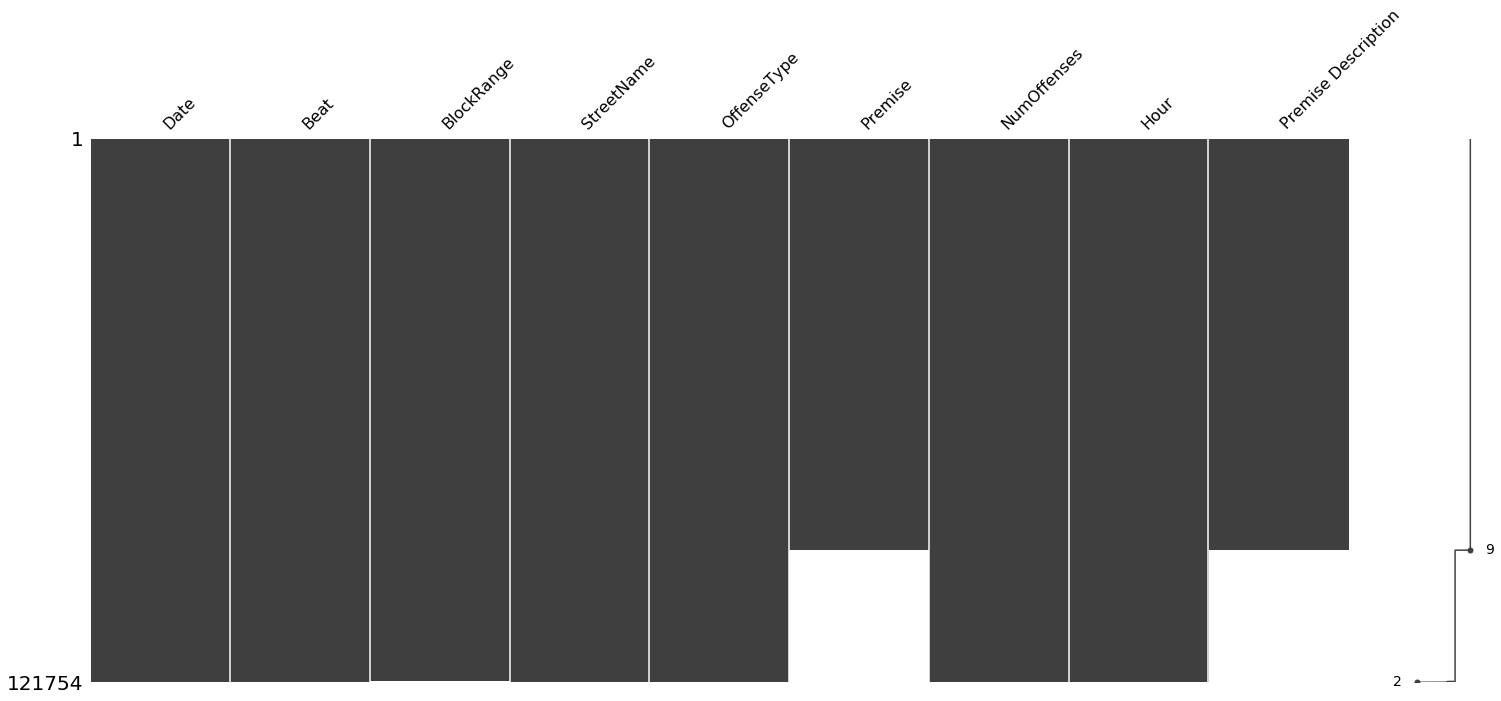

In [62]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [63]:
len(crimes[crimes.isnull().any(axis=1)])

29585

In [64]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
94312,2014-09-28,UNK,7900-7999,GESSNER,Theft,NaN,1.0,2,NaN
121750,NaT,NaN,NaN,NaN,NaN,02V,NaN,NaN,VACANT BANK
121751,NaT,NaN,NaN,NaN,NaN,09V,NaN,NaN,VACANT HOSPITAL
121752,NaT,NaN,NaN,NaN,NaN,13C,NaN,NaN,CONTRA-FLOW/HOV
121753,NaT,NaN,NaN,NaN,NaN,15V,NaN,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [65]:
crimes = crimes.dropna(thresh=3)

In [66]:
len(crimes[crimes.isnull().any(axis=1)])

29581

In [67]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
94308,2014-09-27,UNK,700-799,FM 1960,Aggravated Assault,NaN,1.0,2,NaN
94309,2014-09-07,UNK,500-599,MARSHALL,Theft,NaN,1.0,11,NaN
94310,2014-09-04,UNK,9400-9499,FM 1960,Theft,NaN,1.0,15,NaN
94311,2014-09-14,UNK,12600-12699,LAKE HOUSTON,Theft,NaN,1.0,19,NaN
94312,2014-09-28,UNK,7900-7999,GESSNER,Theft,NaN,1.0,2,NaN


## Inspect each column

In [254]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                           object
Premise Description            object
dtype: object

In [255]:
crimes.Hour.unique()

array([17, 2, 12, 11, 15, 19, 16, 14, 9, 8, 23, 10, 18, 21, 20, 22, 0, 5,
       13, 1, 3, 6, 4, 7, 24, '07', '05', '22', '15', '10', '19', '09',
       '08', '14', "'15", '02', '12', "'07", '16', "'19", "'18", '21',
       '17', '11', '13', '18', '06', "'00", "'05", "'13", "'14", "'22",
       "'23", '04', '03', '23', '20', '00', "'20", "'16", '01', "'17",
       "'06", "'03", "'01", "'09", "'02", "'10", "'11", "'12", "'21",
       "'08", "'04"], dtype=object)

In [256]:
len(crimes.Hour.unique())

73

In [257]:
#crimes.Hour.str.strip()

In [258]:
intcount = 0
strcount = 0
othercount = 0
for i in crimes.Hour:
    if type(i) == str:
#         if "'" in i:
#             print('has 1')
#         else:
#             print(i)

        strcount +=1
    elif type(i) == int:
        intcount += 1
    else:
        print("other")
        othercount+= 1


print('nums={},strings={}, others={}'.format(intcount,strcount,othercount))
#testy.Hour.str.replace('"','')

nums=114137,strings=7613, others=0


In [260]:
# intcount = 0
# strcount = 0
# othercount = 0
# for i in crimes.Hour:
#     if type(i) == str:
#         crimes.Hour[i].str.strip()


#         strcount +=1
#     elif type(i) == int:
#         intcount += 1
#     else:
#         print("other")
#         othercount+= 1


# print('nums={},strings={}, others={}'.format(intcount,strcount,othercount))
# #testy.Hour.str.replace('"','')

In [ ]:
crimes.Hour.unique()

In [ ]:
len(crimes.Hour.unique())

In [261]:
crimes.Hour.value_counts(dropna=False).head()

18    6665
15    6615
16    6553
17    6430
12    6415
Name: Hour, dtype: int64

In [262]:
# replace extra ' with empty space
#crimes['Hour'] = crimes.Hour.str.replace("'", " ")

In [263]:
len(crimes.Hour.value_counts(dropna=False))

73

In [242]:
#crimes.Hour.value_counts(dropna=False)

## Beat

In [243]:
len(crimes.Beat.value_counts())

234

In [244]:
len(crimes.Beat.value_counts(dropna=False))

235

In [245]:
crimes.Beat.unique()

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20', '14D20', '10H10', '3B40', '2A20',
       '12D10', '15E30', '18F40', '20G60', '20G70', '5F10', '1A30',
       '1A40', '4F10', '3B50', '8C10', '1A50', '19G50', '18F50', '18F60',
       '16E20', '10H20', '2A10', '17E30', '2A40', '2A30', '8C60', '1A10',
       '1A20', '11H30', '10H40', '10H50', '19G40', '11H10', '14D10',
       '6B30', '20G20', '16E40', '20G50', '6B40', '17E40', '19G10',
       '18F20', '15E40', '9C40', '7C20', '6B50', '19G20', '7C30', '12D20',
       '10H70', '5F20', '7C10', '4F20', '20G30', '20G10', '20G40',
       '24C50', '6B20', '17E20', '6B60', '10H60', '11H20', '7C50', '5F30',
       '9C10', '10H30', '5F40', '2A60', '24C20', '20G80', '12D30',
       '11H40', '19G30', '8C40', '12D60', '12D50', '10H80', '9C20',
       '6B10', '9C30', '18F30', '4F30', '11H50', '15E10', '7C40', '8C30',
       '12D70', '24C10', '24C60', '18F10', '24C30', '8C20', 'UNK',
       '16E10', '12

In [246]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [247]:
len(crimes.Beat.value_counts(dropna=False))

235

In [248]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [249]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

124

In [264]:
crimes.Beat.unique()

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20', '14D20', '10H10', '3B40', '2A20',
       '12D10', '15E30', '18F40', '20G60', '20G70', '5F10', '1A30',
       '1A40', '4F10', '3B50', '8C10', '1A50', '19G50', '18F50', '18F60',
       '16E20', '10H20', '2A10', '17E30', '2A40', '2A30', '8C60', '1A10',
       '1A20', '11H30', '10H40', '10H50', '19G40', '11H10', '14D10',
       '6B30', '20G20', '16E40', '20G50', '6B40', '17E40', '19G10',
       '18F20', '15E40', '9C40', '7C20', '6B50', '19G20', '7C30', '12D20',
       '10H70', '5F20', '7C10', '4F20', '20G30', '20G10', '20G40',
       '24C50', '6B20', '17E20', '6B60', '10H60', '11H20', '7C50', '5F30',
       '9C10', '10H30', '5F40', '2A60', '24C20', '20G80', '12D30',
       '11H40', '19G30', '8C40', '12D60', '12D50', '10H80', '9C20',
       '6B10', '9C30', '18F30', '4F30', '11H50', '15E10', '7C40', '8C30',
       '12D70', '24C10', '24C60', '18F10', '24C30', '8C20', 'UNK',
       '16E10', '12

In [265]:
crimes.Beat.value_counts(dropna=False).head()

19G10    2667
1A20     2606
6B60     2547
13D20    2460
1A10     2454
Name: Beat, dtype: int64

## BlockRange

In [266]:
len(crimes.BlockRange.value_counts(dropna=False))

251

In [267]:
crimes.BlockRange.value_counts(dropna=False).head()

100-199      1880
2300-2399    1671
900-999      1636
1000-1099    1415
4400-4499    1412
Name: BlockRange, dtype: int64

In [268]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [269]:
len(crimes.BlockRange.value_counts(dropna=False))

251

## StreetName

In [270]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7970


In [271]:
crimes.StreetName = crimes.StreetName.str.strip()

In [272]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7966


In [273]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3458
NORTH         1790
GULF          1756
GESSNER       1680
RICHMOND      1628
Name: StreetName, dtype: int64


## OffenseType

In [274]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [275]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [276]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [277]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66675
Burglary              21145
Auto Theft            13454
Robbery                9998
Aggravated Assault     9460
Rape                    788
Murder                  230
Name: OffenseType, dtype: int64


## Premise

In [278]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:251


In [279]:
crimes.Premise = crimes.Premise.str.strip()

In [280]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:251


In [281]:
crimes.Premise.value_counts(dropna=False).head()

NaN                   29581
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

## Premise Description

In [282]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:251


In [283]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [284]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:251


In [285]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

NaN                      29581
RESIDENCE/HOUSE           6410
Residence or House        6384
APARTMENT                 6094
APARTMENT PARKING LOT     6072
Name: Premise Description, dtype: int64


# Set Date as index

In [286]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [287]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7,Restaurant or Cafeteria
1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3,Miscellaneous Business (Non-Specific)
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,NaN
1920-06-28,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,NaN
1924-12-09,UNK,11000-11099,EASTEX,Theft,Strip Business Center Parking Lot,1.0,11,Strip Business Center Parking Lot


## Create Columns with day,weekday,month,year from date index

In [288]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [289]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7,Restaurant or Cafeteria,08,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3,Miscellaneous Business (Non-Specific),02,Monday,Nov,1914
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,NaN,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,NaN,28,Monday,Jun,1920
1924-12-09,UNK,11000-11099,EASTEX,Theft,Strip Business Center Parking Lot,1.0,11,Strip Business Center Parking Lot,09,Tuesday,Dec,1924


## null values

- check
- count
- display

In [290]:
crimes.isnull().values.any().any()

True

In [291]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

29598

In [292]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,NaN,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,NaN,28,Monday,Jun,1920
1987-12-15,9C40,13300-13399,HALIFAX,Rape,NaN,1.0,19,NaN,15,Tuesday,Dec,1987
1992-01-01,14D20,7400-7499,CALHOUN,Rape,NaN,1.0,14,NaN,01,Wednesday,Jan,1992
2001-08-01,10H50,3000-3099,CLEBURNE,Theft,NaN,1.0,19,NaN,01,Wednesday,Aug,2001
2002-01-01,6B10,11200-11299,BISCAYNE,Rape,NaN,1.0,11,NaN,01,Tuesday,Jan,2002
2002-08-17,1A10,6200-6299,HERMANN PARK,Theft,NaN,1.0,11,NaN,17,Saturday,Aug,2002
2003-07-01,1A10,8100-8199,RICHMOND,Theft,NaN,1.0,15,NaN,01,Tuesday,Jul,2003
2003-07-02,18F30,UNK,FOUNTAIN VIEW,Theft,NaN,1.0,14,NaN,02,Wednesday,Jul,2003


In [293]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121750 entries, 1914-09-08 to NaT
Data columns (total 12 columns):
Beat                   121734 non-null object
BlockRange             121593 non-null object
StreetName             121726 non-null object
OffenseType            121750 non-null object
Premise                92169 non-null object
NumOffenses            121750 non-null float64
Hour                   121750 non-null object
Premise Description    92169 non-null object
day                    121750 non-null object
weekday                121750 non-null object
month                  121750 non-null object
year                   121750 non-null object
dtypes: float64(1), object(11)
memory usage: 12.1+ MB


## New Dataframe
- remove premise col
- keep premise description

In [294]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7,08,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3,02,Monday,Nov,1914
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,28,Monday,Jun,1920
1924-12-09,UNK,11000-11099,EASTEX,Theft,Strip Business Center Parking Lot,1.0,11,09,Tuesday,Dec,1924


In [295]:
crime_yr.isnull().values.any().any()

True

In [296]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

29598

In [297]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,28,Monday,Jun,1920
1987-12-15,9C40,13300-13399,HALIFAX,Rape,NaN,1.0,19,15,Tuesday,Dec,1987
1992-01-01,14D20,7400-7499,CALHOUN,Rape,NaN,1.0,14,01,Wednesday,Jan,1992
2001-08-01,10H50,3000-3099,CLEBURNE,Theft,NaN,1.0,19,01,Wednesday,Aug,2001
2002-01-01,6B10,11200-11299,BISCAYNE,Rape,NaN,1.0,11,01,Tuesday,Jan,2002
2002-08-17,1A10,6200-6299,HERMANN PARK,Theft,NaN,1.0,11,17,Saturday,Aug,2002
2003-07-01,1A10,8100-8199,RICHMOND,Theft,NaN,1.0,15,01,Tuesday,Jul,2003
2003-07-02,18F30,UNK,FOUNTAIN VIEW,Theft,NaN,1.0,14,02,Wednesday,Jul,2003


# FIND NANS

## INDEX

In [298]:
len(crime_yr[crime_yr.index.isnull()])

4

In [299]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
NaT,13D40,8500-8599,SAM HOUSTON,Theft,NaN,1.0,15,NaT,NaT,NaT,NaT
NaT,18F40,2700-2799,DUNVALE,Robbery,NaN,1.0,14,NaT,NaT,NaT,NaT
NaT,14D40,5600-5699,SELINSKY,Burglary,NaN,1.0,08,NaT,NaT,NaT,NaT
NaT,7C20,3900-3999,CAVALCADE,Theft,NaN,1.0,11,NaT,NaT,NaT,NaT


In [300]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1914-09-08', '1914-11-02', '1914-12-03', '1920-06-28',
               '1924-12-09', '1971-02-03', '1973-05-01', '1980-05-01',
               '1984-01-23', '1987-12-15',
               ...
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2019-12-25'],
              dtype='datetime64[ns]', name='Date', length=121746, freq=None)

In [301]:
len(crime_yr[crime_yr.index.isnull()])

4

## Beat

In [302]:
len(crime_yr[crime_yr.Beat.isnull()])

16

In [303]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2013-06-11,NaN,2200-2299,W. DALLAS,Burglary,NaN,1.0,22,11,Tuesday,Jun,2013
2013-12-01,NaN,700-799,W. DONOVAN,Theft,NaN,1.0,11,01,Sunday,Dec,2013
2014-06-05,NaN,2600-2699,LP W 405,Theft,NaN,1.0,13,05,Thursday,Jun,2014
2014-06-11,NaN,400-499,MAIN,Theft,NaN,1.0,14,11,Wednesday,Jun,2014
2014-06-13,NaN,5400-5499,WEST LOOP S SER,Theft,NaN,1.0,14,13,Friday,Jun,2014


In [304]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [305]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [306]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## BlockRAnge

In [307]:
len(crime_yr[crime_yr.BlockRange.isnull()])

157

In [308]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2007-07-01,1A10,NaN,LITTLE YORK RD,Theft,NaN,1.0,10,01,Sunday,Jul,2007
2013-06-11,1A10,NaN,HAYES,Theft,NaN,1.0,11,11,Tuesday,Jun,2013
2013-06-29,1A10,NaN,RUSK,Theft,NaN,1.0,15,29,Saturday,Jun,2013
2013-11-23,1A10,NaN,METROPOLITAN,Theft,NaN,1.0,8,23,Saturday,Nov,2013
2014-01-01,1A10,NaN,TIDWELL RD,Theft,NaN,1.0,13,01,Wednesday,Jan,2014


## StreetName

In [309]:
len(crime_yr[crime_yr.StreetName.isnull()])

24

In [310]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2014-05-05,3B40,UNK,NaN,Theft,NaN,1.0,11,05,Monday,May,2014
2014-06-30,8C10,5000-5099,NaN,Burglary,NaN,1.0,0,30,Monday,Jun,2014
2014-07-01,3B40,NaN,NaN,Theft,NaN,1.0,16,01,Tuesday,Jul,2014
2014-07-07,12D20,NaN,NaN,Auto Theft,NaN,1.0,6,07,Monday,Jul,2014
2014-07-21,3B40,NaN,NaN,Burglary,NaN,1.0,14,21,Monday,Jul,2014


## OffenseType

In [311]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [312]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Hour

In [313]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [314]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie Description

In [315]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

29581

In [316]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,03,Thursday,Dec,1914
1920-06-28,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,28,Monday,Jun,1920
1987-12-15,9C40,13300-13399,HALIFAX,Rape,NaN,1.0,19,15,Tuesday,Dec,1987
1992-01-01,14D20,7400-7499,CALHOUN,Rape,NaN,1.0,14,01,Wednesday,Jan,1992
2001-08-01,10H50,3000-3099,CLEBURNE,Theft,NaN,1.0,19,01,Wednesday,Aug,2001


In [317]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [318]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [319]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [320]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

178

In [321]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2007-07-01,1A10,NaN,LITTLE YORK RD,Theft,No label,1.0,10,01,Sunday,Jul,2007
2013-06-11,1A10,NaN,HAYES,Theft,No label,1.0,11,11,Tuesday,Jun,2013
2013-06-29,1A10,NaN,RUSK,Theft,No label,1.0,15,29,Saturday,Jun,2013
2013-11-23,1A10,NaN,METROPOLITAN,Theft,No label,1.0,8,23,Saturday,Nov,2013
2014-01-01,1A10,NaN,TIDWELL RD,Theft,No label,1.0,13,01,Wednesday,Jan,2014
2014-04-21,1A10,NaN,HUNTINGTON VENTURE DR,Theft,No label,1.0,14,21,Monday,Apr,2014
2014-04-26,1A10,NaN,JENSEN DR / SAUNDERS,Theft,No label,1.0,11,26,Saturday,Apr,2014
2014-05-05,3B40,UNK,NaN,Theft,No label,1.0,11,05,Monday,May,2014
2014-05-08,1A10,NaN,LOCKWOOD,Theft,No label,1.0,12,08,Thursday,May,2014


## Save

In [322]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121750 entries, 1914-09-08 to NaT
Data columns (total 11 columns):
Beat           121750 non-null object
BlockRange     121593 non-null object
StreetName     121726 non-null object
OffenseType    121750 non-null object
Premise        121750 non-null object
NumOffenses    121750 non-null float64
Hour           121750 non-null object
day            121750 non-null object
weekday        121750 non-null object
month          121750 non-null object
year           121750 non-null object
dtypes: float64(1), object(10)
memory usage: 11.1+ MB


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [ ]:
crime_yr.Hour.unique()

In [323]:
ls crime_data_clean/new

crime10_clean.csv*  crime15_clean.csv*        Final_crime12_clean.csv*
crime11_clean.csv*  crime16_clean.csv*        Final_crime13_clean.csv*
crime12_clean.csv*  crime17_clean.csv*        Final_crime15_clean.csv*
crime13_clean.csv*  Final_crime10_clean.csv*
crime14_clean.csv*  Final_crime11_clean.csv*


In [324]:
crime_yr.to_csv('crime_data_clean/new/Final_crime14_clean.csv')

In [325]:
ls crime_data_clean/new

crime10_clean.csv*  crime15_clean.csv*        Final_crime12_clean.csv*
crime11_clean.csv*  crime16_clean.csv*        Final_crime13_clean.csv*
crime12_clean.csv*  crime17_clean.csv*        Final_crime14_clean.csv*
crime13_clean.csv*  Final_crime10_clean.csv*  Final_crime15_clean.csv*
crime14_clean.csv*  Final_crime11_clean.csv*
